In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('linregdata.txt', sep=",", header=None)

# Part A

In [3]:
data = data.replace('F',0)
data = data.replace('I',1)
data = data.replace('M',2)
data = data.values
print(data.shape)
#np.delete(data,[0,1,2],axis=1).shape

(4177, 9)


In [4]:
col_attr = np.zeros((len(data),3))
for i in range(len(col_attr)):
    if data[i][0] == 0:
        col_attr[i][0] = 1
    if data[i][0] == 1:
        col_attr[i][1] = 1
    if data[i][0] == 2:
        col_attr[i][2] = 1

In [5]:
data = data[:,1:]         #remove first column
data.shape

(4177, 8)

# Part B (Normalized Data)

In [6]:
#Normalized data except encoded-female, infant and male 
#normalize_data = preprocessing.scale(data[:,:-1])
processed_data = np.hstack((col_attr,data[:,:-1]))
processed_data = preprocessing.scale(processed_data)

# Part C (Implement Functions)

# weights = (𝑋.𝑇rans*𝑋+𝜆*𝐼).inverse*𝑋.𝑇rans*𝑌

In [7]:
def mylinridgereg(X, Y, lamda):
    I = np.identity(len(X.T))
    inter = np.linalg.pinv(np.dot(X.T,X) + np.dot(lamda,I))
    inter1 = np.dot(X.T,Y)
    return np.dot(inter,inter1)

In [8]:
def mylinridgeregeval(X, weights):
    return np.dot(X,weights) + 10

In [9]:
def meansquarederr(T, Tdash):
    #return (np.linalg.norm(T-Tdash))
    return mean_squared_error(T,Tdash)

# Part D (Divide Data and test)

In [10]:
def partition(data,frac):
    partition_frac = int(len(data)*(1.0 - frac))
    X_train = data[:partition_frac,:]
    y_train = data[:partition_frac,-1]
    X_test = data[partition_frac:,:]
    y_test = data[partition_frac:,-1]
    return X_train,X_test,y_train,y_test

In [11]:
#With Added one hot encoding like column(encoded-female, infant and male)
partition_frac = int(len(data)*(1.0 - 0.2))
X_train = processed_data[:partition_frac,:]
y_train = data[:partition_frac,-1]
X_test = processed_data[partition_frac:,:]
y_test = data[partition_frac:,-1]
#X_train,X_test,y_train,y_test = partition(data_encoded,0.2)

In [12]:
lamda = 0.01

In [13]:
print(X_train.shape,X_test.shape)

(3341, 10) (836, 10)


In [14]:
def FindMSE(X_train,X_test,y_train,y_test,lamda):
    weights = mylinridgereg(X_train,y_train,lamda)

    predicted_train = mylinridgeregeval(X_train, weights)
    mse_train = meansquarederr(predicted_train,y_train)

    predicted_test = mylinridgeregeval(X_test, weights)
    mse_test = meansquarederr(predicted_test,y_test)
    return weights,mse_train,mse_test
_,_, _ = FindMSE(X_train,X_test,y_train,y_test,lamda)

# Part E

## Lamda :  0.012720658047387312 best performance, some weights are positive and negative.

## Viscera weight is most significant attribute

In [15]:
random_lamda = [np.random.rand() for x in range(10)]
random_lamda = np.sort(random_lamda)
for i in random_lamda:
    print( "Lamda : ", i)
    weight,train, test = FindMSE(X_train,X_test,y_train,y_test,i)
    print("Weight :",weight)
    print("Train error :",train)
    print("Test error :",test)
    print()

Lamda :  0.048719610071746744
Weight : [ 0.29053887 -0.53074556  0.23486838 -1.23489218  1.87710184  0.49602587
  3.56705758 -4.47231154 -0.98346012  2.05167628]
Train error : 5.249533117630526
Test error : 4.2313672891613106

Lamda :  0.2833220833599517
Weight : [ 0.29074299 -0.53098959  0.23490848 -1.22780094  1.86948216  0.49625221
  3.52751831 -4.45337489 -0.97477255  2.06487203]
Train error : 5.249450892691269
Test error : 4.230836794149085

Lamda :  0.283327517824813
Weight : [ 0.29074299 -0.5309896   0.23490848 -1.22780078  1.86948198  0.49625221
  3.52751741 -4.45337446 -0.97477235  2.06487234]
Train error : 5.249450891027954
Test error : 4.230836782195202

Lamda :  0.3056955037221175
Weight : [ 0.29076229 -0.53101266  0.23491226 -1.22712825  1.86875954  0.49627377
  3.52379294 -4.45158874 -0.97395441  2.06611367]
Train error : 5.249444133914319
Test error : 4.230787702504657

Lamda :  0.3752800508914712
Weight : [ 0.29082216 -0.53108417  0.23492396 -1.22504006  1.86651655  0.4

# After Feature Removal

In [16]:
def findMinThree(wt):
    idx1 = np.argmin(wt)
    wt = np.delete(wt,[idx1],axis=0)
    idx2 = np.argmin(wt)
    wt = np.delete(wt,[idx2],axis=0)
    idx3 = np.argmin(wt)
    return idx1,idx2,idx3
        

In [17]:
for i in random_lamda:
    print( "Lamda : ", i)
    weights = mylinridgereg(X_train,y_train,lamda)
    abs_weight = np.abs(weights)
    idx1,idx2,idx3 = findMinThree(abs_weight)

    X_train_reduce = np.delete(X_train,[idx1,idx2,idx3],axis=1)
    X_test_reduce = np.delete(X_test,[idx1,idx2,idx3],axis=1)

    _,train, test = FindMSE(X_train_reduce,X_test_reduce,y_train,y_test,i)
    
    print("Train error :",train)
    print("Test error :",test)
    print()

Lamda :  0.048719610071746744
Train error : 5.221926415672099
Test error : 4.141165582594175

Lamda :  0.2833220833599517
Train error : 5.222109793955792
Test error : 4.141202504562378

Lamda :  0.283327517824813
Train error : 5.222109798392014
Test error : 4.141202505666415

Lamda :  0.3056955037221175
Train error : 5.222128129239675
Test error : 4.141207144438996

Lamda :  0.3752800508914712
Train error : 5.222186059924795
Test error : 4.141222771278909

Lamda :  0.4037428841324663
Train error : 5.22221014486279
Test error : 4.141229677294454

Lamda :  0.6386136141497705
Train error : 5.222417163001442
Test error : 4.141297600165657

Lamda :  0.6453092398452234
Train error : 5.222423273774757
Test error : 4.141299813036146

Lamda :  0.730893998628664
Train error : 5.222502362770668
Test error : 4.1413293944118434

Lamda :  0.8935145139502376
Train error : 5.2226574901032565
Test error : 4.141392017762585



# Part F

## Yes, affect of lamda is there on error change for different partiton of data

In [18]:
#random_lamda = np.arange(1,6,1)
random_lamda = [np.random.rand() for x in range(10)]
random_lamda = np.sort(random_lamda)
errors_test = []
errors_train = []

for i in [0.2,0.3,0.4,0.5,0.55]:
    e_train =[]
    e_test = []
    for j in random_lamda:
        ave_test, ave_train= 0,0
        for k in range(25):
            np.random.shuffle(data)
            split_frac = int(len(data)*(1.0 - i))
            X_train = data[:split_frac,:-1]
            y_train = data[:split_frac,-1]
            X_train = np.hstack((col_attr[:split_frac,:],X_train))
            standarized_X_train = preprocessing.scale(X_train)
            mean_X_train = np.mean(X_train)
            var_X_train = np.var(X_train)
            #print(mean_X_train,var_X_train)



            X_test = data[split_frac:,:-1]
            X_test = np.hstack((col_attr[split_frac:,:],X_test))
            stand_X_test = (X_test-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
            
            y_test = data[split_frac:,-1]

            _,mse_train ,mse_test = FindMSE(standarized_X_train,stand_X_test,y_train,y_test,j)
            ave_train += mse_train
            ave_test += mse_test
        e_train.append((ave_train/25))
        e_test.append((ave_test/25))
    
    errors_train.append(e_train)
    errors_test.append(e_test)

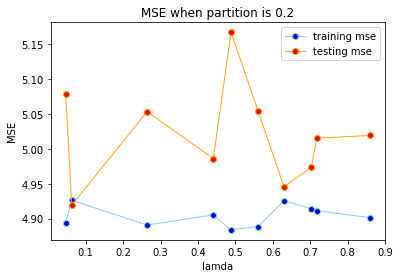

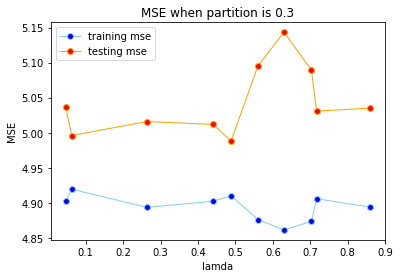

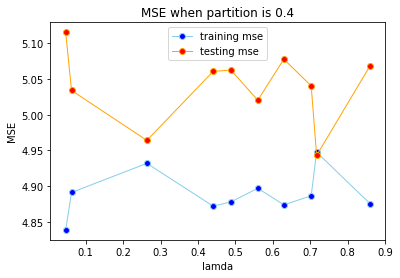

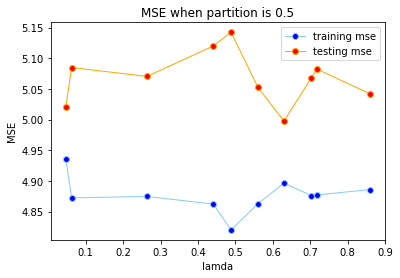

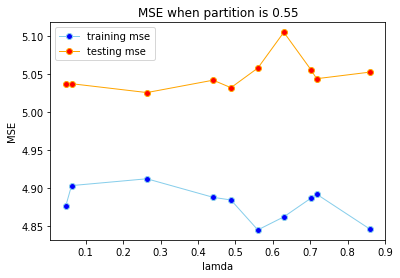

In [19]:
errors_train = np.asarray(errors_train)
errors_test = np.asarray(errors_test)

part_array = [0.2,0.3,0.4,0.5,0.55]
for i in range(len(part_array)):
    plt.plot(random_lamda ,errors_train[i] , marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=1,label='training mse')
    plt.plot(random_lamda ,errors_test[i] , marker='o', markerfacecolor='red', markersize=6, color='orange', linewidth=1,label='testing mse')
    plt.xlabel('lamda') 
    plt.ylabel('MSE') 
    s = 'MSE when partition is ' + str(part_array[i])
    # giving a title to my graph 
    plt.title(s) 
    plt.legend(loc='best')
    # function to show the plot 
    plt.show()


# Part G

## Ave MSE depends on lamda and also on partition

In [20]:
min_avg_test = []
min_lamda_test = []
min_avg_train = []
min_lamda_train = []
for i in range(errors_train.shape[0]):
    min_avg_train.append(np.min(errors_train[i]))
    index_train = np.argmin(errors_train[i])
    min_lamda_train.append(random_lamda[index_train])
    
    min_avg_test.append(np.min(errors_test[i]))
    index_test = np.argmin(errors_test[i])
    min_lamda_test.append(random_lamda[index_test])

No handles with labels found to put in legend.


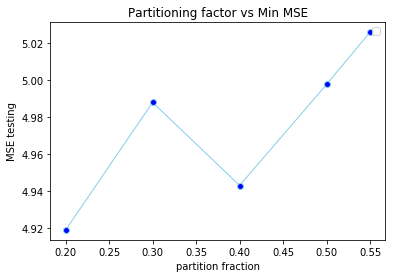

In [21]:
plt.plot(part_array ,min_avg_test , marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=1)
plt.xlabel('partition fraction') 
plt.ylabel('MSE testing') 
s = "Partitioning factor vs Min MSE"

# giving a title to my graph 
plt.title(s) 
plt.legend(loc='best')
# function to show the plot 
plt.show()

No handles with labels found to put in legend.


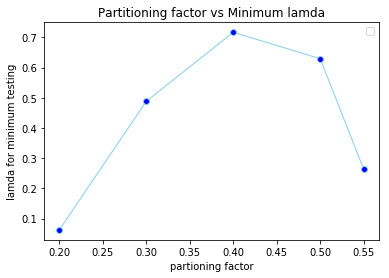

In [22]:
plt.plot(part_array ,min_lamda_test , marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=1)
plt.xlabel('partioning factor') 
plt.ylabel('lamda for minimum testing') 
s = "Partitioning factor vs Minimum lamda"
# giving a title to my graph 
plt.title(s) 
plt.legend(loc='upper right')
# function to show the plot 
plt.show()

# Part H

## Model seems to be stable as MSE errors are tighlty coupled and most of the point lies near 45 degree.

In [23]:
idx = np.argmin(min_avg_train)
best_partition = part_array[idx]
corresponding_lamda = min_lamda_train[idx]
print(best_partition,corresponding_lamda)

0.5 0.4882182266032433


In [24]:
split = int(len(data)*(1-best_partition))
X_train = np.hstack((col_attr[:split,:],data[:split,:-1]))
y_train = data[:split,-1]
X_test = np.hstack((col_attr[split:,:],data[split:,:-1]))
y_test = data[split:,-1]

best_train_data = preprocessing.scale(X_train)
best_test_data = preprocessing.scale(X_test)



weights = mylinridgereg(best_train_data,y_train,0.1)
predicted_test = mylinridgeregeval(best_test_data, weights)
predicted_train = mylinridgeregeval(best_train_data, weights)




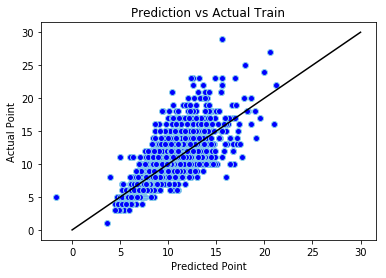

In [25]:
plt.plot(predicted_train ,y_train , marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=0)
plt.plot([0,30],[0,30],color="black")
#plt.plot(random_lamda ,test[i] , marker='o', markerfacecolor='red', markersize=6, color='orange', linewidth=1,label='testing mse')
plt.xlabel('Predicted Point') 
plt.ylabel('Actual Point') 
s = "Prediction vs Actual Train"
# giving a title to my graph 
plt.title(s) 
# function to show the plot 
plt.show()

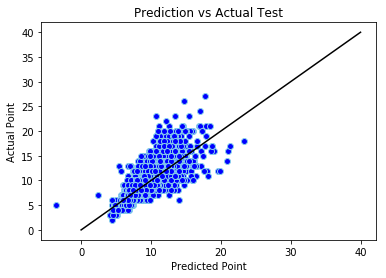

In [26]:
plt.plot(predicted_test ,y_test , marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=0)
#plt.plot(random_lamda ,test[i] , marker='o', markerfacecolor='red', markersize=6, color='orange', linewidth=1,label='testing mse')
plt.plot([0,40],[0,40],color="black")
plt.xlabel('Predicted Point') 
plt.ylabel('Actual Point') 
s = "Prediction vs Actual Test"
# giving a title to my graph 
plt.title(s) 

# function to show the plot 
plt.show()